<font size=5>Data and Analysis: Finding Agency Inefficiencies within the DEP using Water Complaints</font>

**Importing The Data**

In [42]:
import pandas as pd
import datetime
import numpy
import matplotlib.pyplot as plt

In [31]:
water_data = pd.read_csv("Desktop/water_quality_complaints.csv")

**Initializing the Dataset**

The code below selects only the columns I'm choosing to work with and renaming them for easier use. It also converts some of date columns and creates a new column for the year a complaint was placed. Because further analysis looks into resolution time, a new column is created for that as well. Furthermore, the code limits the data to only rows pertaining to 2010-2017 and for those that aren't missing information. Dropping missing zipcodes wasn't an issue because it made up a small portion of the full DEP data. The closed cases column is left with missing values since there are cases that are still unresolved. 

In [32]:
water_data = water_data[["Created Date","Closed Date", "Status", "Unique Key","Incident Zip","Descriptor"]] #selecting only the columns I need
water_data.columns = ["created", "closed", "status", "comp", "zipcode", "desc"]  #renaming columns for easier use

In [33]:
missing_zip = water_data["zipcode"].isnull().sum()
print("There are {0} zipcodes missing data.".format(missing_zip))

There are 28 zipcodes missing data.


In [34]:
water_data["created"] = pd.to_datetime(water_data["created"])
water_data["closed"] = pd.to_datetime(water_data["closed"])
water_data["year"] = pd.DatetimeIndex(water_data["created"]).year  #creating a new column for year a complaint was placed
water_data["lapsed_time"] = (water_data["closed"] - water_data["created"]).dt.days  #creating a new column for resolution time
water_data = water_data[water_data["year"].between(2010,2017)]
water_data = water_data.dropna(subset=["zipcode"]) #drop all zipcodes that are missing data
water_data["zipcode"] = water_data["zipcode"].astype(str) #convert zipcodes to text instead of numeric

**How is the number of complaints changing over time?**

Despite the small dip in 2011, there is a general upward trend in the number of water complaints placed per year through the DEP

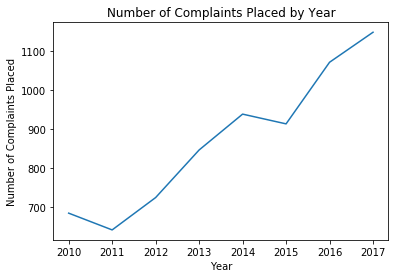

year
2010     684
2011     641
2012     724
2013     846
2014     938
2015     913
2016    1071
2017    1148
Name: comp, dtype: int64


In [117]:
yearly_data = water_data.groupby(["year"]).count()
yearly_data["comp"].plot()
plt.xlabel("Year")
plt.ylabel("Number of Complaints Placed")
plt.title("Number of Complaints Placed by Year")
plt.show()
print(yearly_data["comp"])

**Is the agency getting better at closing complaints?**

Though there is a dip in closed complaints from 2010 to 2011, the general trend is upward in the number of resolved complaints per year. To put this trend into context, the code below looks at the ratio of unresolved complaints to closed ones by year. At least 98% of all complaints received per year have a closed status. The year 2016 saw the most complaints left unresolved, but those still only made up 1% of all complaints that year, which is negligible. Years 2011, 2013, and 2015 all had 100% rate of closed complaints. From this angle, the DEP is running fairly efficiently. 

In [36]:
yearly_closed_cases = water_data.loc[water_data["status"] == "Closed"].groupby(["year"])
total_yearly_closed_cases = yearly_closed_cases["comp"].count()
yearly_open_cases = water_data.loc[water_data["status"].isin(["Open", "Pending", "Started"])].groupby(["year"])
total_yearly_open_cases = yearly_open_cases["comp"].count()
print(total_yearly_closed_cases)
print(total_yearly_open_cases)

year
2010     874
2011     842
2012    1083
2013    1173
2014    1176
2015    1230
2016    1432
2017    1515
Name: comp, dtype: int64
year
2010     2
2012     1
2014     9
2016    17
2017     8
Name: comp, dtype: int64


In [65]:
total = water_data.groupby(["year"])
total_complaints = total["comp"].count()
perc = (total_yearly_closed_cases/total_complaints)*100
perc = perc.round(2)
print(perc)

year
2010     99.77
2011    100.00
2012     99.91
2013    100.00
2014     99.24
2015    100.00
2016     98.83
2017     99.47
Name: comp, dtype: float64


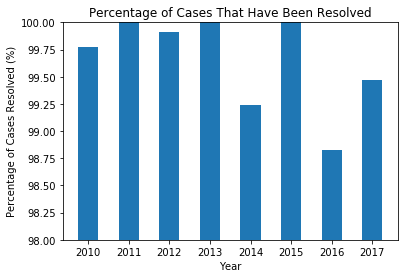

In [115]:
from numpy import arange
fig, ax = plt.subplots()
num_cols = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
bar_positions = arange(8) + 1
bar_heights = perc.iloc[0:8].values
tick_positions = range(1,9)
ax.bar(bar_positions,bar_heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_ylim([98,100])
ax.set_xticklabels(num_cols)
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Cases Resolved (%)")
ax.set_title("Percentage of Cases That Have Been Resolved")
plt.show()

**Finding zipcodes with the highest number of open and pending complaints**

The following code sorts the zipcodes with the highest number of unresolved cases. From 2010-2017, this zipcode has been 11374 with three open cases. This zipcode is located in Rego Park of Queens, NY. However, after looking into the portion these unresolved cases make up of all its zipcode's complaints, it only came out to 5%.  Looking into which zipcode historically had the highest percentage of unresolved cases, code below finds that 10% of zipcode 11370's cases are unresolved. Again, this is a misleading statistic since zipcode 11370 has had only ten complaints, one of which is still open. This analysis does not seem to indicate any structural inefficiencies at the DEP.

In [17]:
unresolved_cases = water_data.loc[water_data["status"].isin(["Open", "Pending", "Started"])].groupby(["zipcode"]).count()
unresolved_cases = unresolved_cases["comp"].sort_values(ascending=False)
all_cases = water_data.groupby(["zipcode"]).count()["comp"]
per_cases = (unresolved_cases/all_cases*100).sort_values(ascending=False)
print(per_cases)
#per_cases = water_data.loc[water_data["zipcode"] == "11374.0", "comp"].count()

zipcode
11370.0    10.000000
11363.0     8.695652
11421.0     7.142857
11436.0     5.263158
11374.0     4.918033
11379.0     4.166667
11217.0     3.773585
11102.0     3.125000
11692.0     2.941176
10011.0     2.739726
10033.0     2.500000
11415.0     2.380952
10302.0     2.380952
10471.0     2.083333
10013.0     2.083333
10021.0     1.818182
10456.0     1.694915
10461.0     1.694915
11206.0     1.666667
10308.0     1.515152
10025.0     1.379310
11432.0     1.351351
10468.0     1.315789
11201.0     1.315789
11226.0     1.265823
10016.0     1.219512
11236.0     1.162791
10023.0     1.123596
10314.0     0.666667
10000.0          NaN
             ...    
11368.0          NaN
11369.0          NaN
11372.0          NaN
11373.0          NaN
11375.0          NaN
11377.0          NaN
11378.0          NaN
11385.0          NaN
11411.0          NaN
11412.0          NaN
11413.0          NaN
11414.0          NaN
11416.0          NaN
11417.0          NaN
11418.0          NaN
11419.0          NaN
11420

**What is the agency’s average resolution time per year? Which zip codes have the longest resolution times?**

The lapsed time column calculates how many days the DEP took in closing a case. The code below fistly filters any bad data where the lapsed time is a negative value, meaning the closed data came sooner than the date a complaint was placed. It then graphed the average resolution time by year. Year 2011 saw the most efficient average resolution time of about 17 days. Since 2014, the resolution times has been on the rise which could pooint to possible inefficency within the DEP. However, earlier findings show that the number of complaints has also been on the rise, so this could be a potential explanation for this. 

In [135]:
water_data = water_data.loc[water_data["lapsed_time"] > 0]
res_time = water_data.groupby(["year"], as_index=False).mean()
print(res_time[["year","lapsed_time"]])

   year  lapsed_time
0  2010    27.519006
1  2011    17.450858
2  2012    18.366022
3  2013    26.635934
4  2014    18.095949
5  2015    22.490690
6  2016    27.554622
7  2017    26.252613


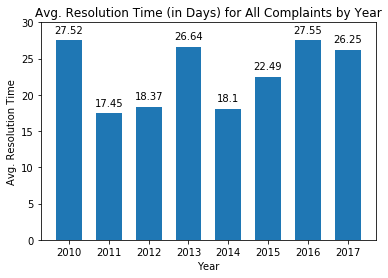

In [137]:
fig, ax = plt.subplots()
num_cols = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]
bar_positions = arange(8) + 1
bar_heights = res_time["lapsed_time"].round(decimals=2)
tick_positions = range(1,9)
ax.bar(bar_positions,bar_heights, 0.65)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols)
ax.set_ylim([0,30])

rects = ax.patches

labels = res_time["lapsed_time"].round(decimals=2).values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + .75, label,
            ha='center', va='bottom')

plt.xlabel("Year")
plt.ylabel("Avg. Resolution Time")
plt.title("Avg. Resolution Time (in Days) for All Complaints by Year")
plt.show()